In [1]:
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor
)

from sklearn.model_selection import GridSearchCV

from utils.data import fires, FEATURE_NAMES
from utils.visualization import plot_decisions

%matplotlib inline


In [2]:
X, y_log = fires[FEATURE_NAMES], fires["log(area+1)"]

## Parameter Tuning

In [3]:
min_samples_split_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
max_depth_range = [1, 2, 4, 5, 10, 15, 20, 25]
n_estimators_range = [10, 20, 50, 100, 150, 200, 500]

### Random Forest Regressor

In [4]:
rf_search = GridSearchCV(
    RandomForestRegressor(),
    param_grid={"min_samples_split": min_samples_split_range,
                "max_depth": max_depth_range,
                "n_estimators": n_estimators_range},
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
)

In [5]:
rf_search.fit(X, y_log)

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [1, 2, 4, 5, 10, 15, 20, 25], 'n_estimators': [10, 20, 50, 100, 150, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [6]:
rf_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
rf_search.best_score_

-1.1936521028452873

#### Visualize Decisions

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.6/site-packages/dojo/dimred/pca.py:49: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  eig_pairs[i][1] for i in range(self.n_components)


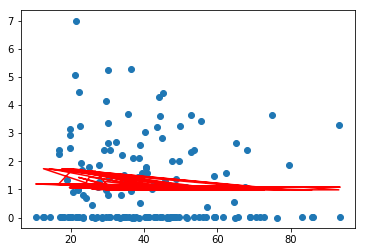

In [8]:
plot_decisions(rf_search.best_estimator_, X, y_log)

***

### Extra-Trees Regressor

In [9]:
extra_search = GridSearchCV(
    ExtraTreesRegressor(),
    param_grid={"min_samples_split": min_samples_split_range,
                "max_depth": max_depth_range,
                "n_estimators": n_estimators_range},
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
)

In [10]:
extra_search.fit(X, y_log)

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [1, 2, 4, 5, 10, 15, 20, 25], 'n_estimators': [10, 20, 50, 100, 150, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [11]:
extra_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=5,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=8,
          min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
extra_search.best_score_

-1.1979513362949636

#### Visualize Decisions

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.6/site-packages/dojo/dimred/pca.py:49: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  eig_pairs[i][1] for i in range(self.n_components)


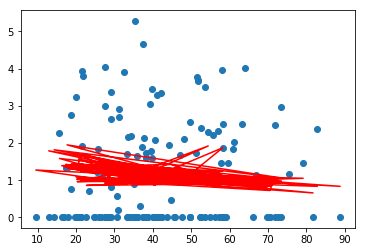

In [13]:
plot_decisions(extra_search.best_estimator_, X, y_log)

***

### Gradient Boosting Regressor

In [14]:
gbm_search = GridSearchCV(
    ExtraTreesRegressor(),
    param_grid={"min_samples_split": min_samples_split_range,
                "max_depth": max_depth_range,
                "n_estimators": n_estimators_range},
    cv=10,
    n_jobs=-1,
    scoring="neg_mean_absolute_error",
)

In [15]:
gbm_search.fit(X, y_log)

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [1, 2, 4, 5, 10, 15, 20, 25], 'n_estimators': [10, 20, 50, 100, 150, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [16]:
gbm_search.best_estimator_

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=5,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=8,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [17]:
gbm_search.best_score_

-1.1991218377996264

#### Visualize Decisions

/Users/victor/.local/share/virtualenvs/firewall-npje4pOc/lib/python3.6/site-packages/dojo/dimred/pca.py:49: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  eig_pairs[i][1] for i in range(self.n_components)


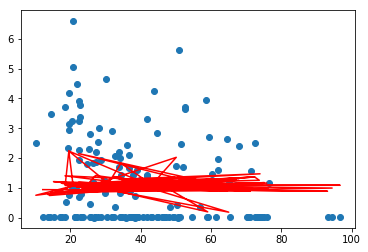

In [18]:
plot_decisions(gbm_search.best_estimator_, X, y_log)

## Save the trained, tuned models

In [19]:
import pickle

In [20]:
with open("rand_forest.b", "wb") as f:
    pickle.dump(rf_search.best_estimator_, f)
    
with open("extra_trees.b", "wb") as f:
    pickle.dump(extra_search.best_estimator_, f)
    
with open("gbm.b", "wb") as f:
    pickle.dump(gbm_search.best_estimator_, f)